# Test Model with Images

In [1]:
import torch
import numpy as np
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
import models
from PIL import Image
import matplotlib.pyplot as plt
img_size = 224
num_classes = 2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = 'cpu'
print('Device:', device)
num_gpu = torch.cuda.device_count()
print('Number of available GPUs:', num_gpu)

Device: cuda:0
Number of available GPUs: 8


#### Load Test Images

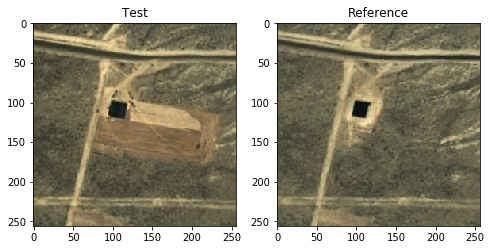

In [18]:
test_img_orig = Image.open('Comp.png')
ref_img_orig = Image.open('Ref.png')

test_img = Image.open('Comp.png')
ref_img = Image.open('Ref.png')
#test_img = Image.open('test_img.png')
#ref_img = Image.open('ref_img.png')
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(test_img)
plt.title('Test')
fig.add_subplot(1, 2, 2)
plt.imshow(ref_img)
plt.title('Reference')
plt.show()

#### Transforms on Input Image

In [19]:
trf = transforms.Compose([
        transforms.Resize(img_size),
        transforms.CenterCrop(img_size),
        transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

# Apply transform and bring to the format batch, channels, width, height
test_img = trf(test_img).unsqueeze(0)
ref_img = trf(ref_img).unsqueeze(0)
print('test_img.shape:', test_img.shape)

test_img.shape: torch.Size([1, 3, 224, 224])


#### Initialize Model and Load Checkpoint

In [20]:
change_net = models.ChangeNet(num_classes=num_classes)
if num_gpu > 1:
    change_net = nn.DataParallel(change_net)
change_net = change_net.to(device)

checkpoint = torch.load('./best_model.pkl')
change_net.load_state_dict(checkpoint);
change_net.eval();

#### Run Model

In [25]:
pred = change_net([ref_img, test_img])
#pred = change_net([test_img, ref_img])
# Get the correct class by looking for the max value across channels
_, output = torch.max(pred, 1)

#### Display Results

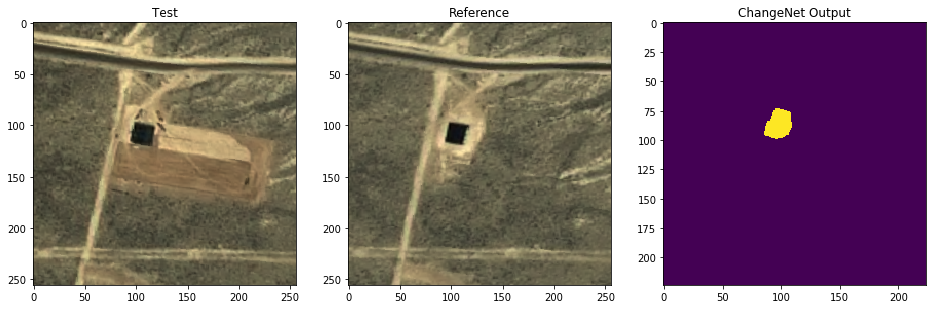

In [26]:
fig=plt.figure(figsize=(16, 16))
fig.add_subplot(1, 3, 1)
#plt.imshow(test_img.squeeze(0).permute(1, 2, 0).cpu().numpy())
plt.imshow(test_img_orig)
plt.title('Test')
fig.add_subplot(1, 3, 2)
#plt.imshow(ref_img.squeeze(0).permute(1, 2, 0).cpu().numpy())
plt.imshow(ref_img_orig)
plt.title('Reference')
fig.add_subplot(1, 3, 3)
plt.imshow(output.squeeze(0).cpu().numpy())
plt.title('ChangeNet Output')
plt.show()